# Predicting Heart Disease Likelihood in Cleveland Patients Using Age and Cholesterol Levels
### Name: Alice Le

## Introduction
Heart disease is a leading cause of death in the United States, with coronary artery disease being the most prevalent type. This condition often leads to heart attacks as the coronary arteries, which supply oxygen-rich blood to the body, become blocked or narrowed. When these arteries are compromised, the body's overall functioning can be severely affected due to inadequate blood flow (Cleveland Clinic, n.d.). Several risk factors contribute to the development of heart disease, including high cholesterol levels and aging (WebMD Editorial Contributors, 2023). Therefore, my proposed question is: **Can a new patient's likelihood of having heart disease be predicted based on their age and cholesterol levels?**

The study will utilize the [UCI Heart Disease Dataset from Cleveland](https://archive.ics.uci.edu/dataset/45/heart+disease) for analysis.

## Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [7]:
#read data
cleveland <- read_csv("data/heart_disease/processed.cleveland.data",
    col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

#clean and wrangle
cleveland_graph <- cleveland |> mutate(num_letter = num > 0)
head(cleveland_graph)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num_letter
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<lgl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE


In [8]:
#splitting data into training and testing set
cleveland_split <- initial_split(cleveland_graph, prop = 0.75, strata = num_letter)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

#summarize training data
diag_summary <- cleveland_graph |>
    group_by(num_letter) |>
    summarize(age_max = max(age), age_min = min(age), age_avg = mean(age),
              chol_max = max(chol), chol_min = min(age), chol_avg = mean(chol))
diag_summary

num_letter,age_max,age_min,age_avg,chol_max,chol_min,chol_avg
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,76,29,52.58537,564,29,242.6402
TRUE,77,35,56.62590,409,35,251.4748


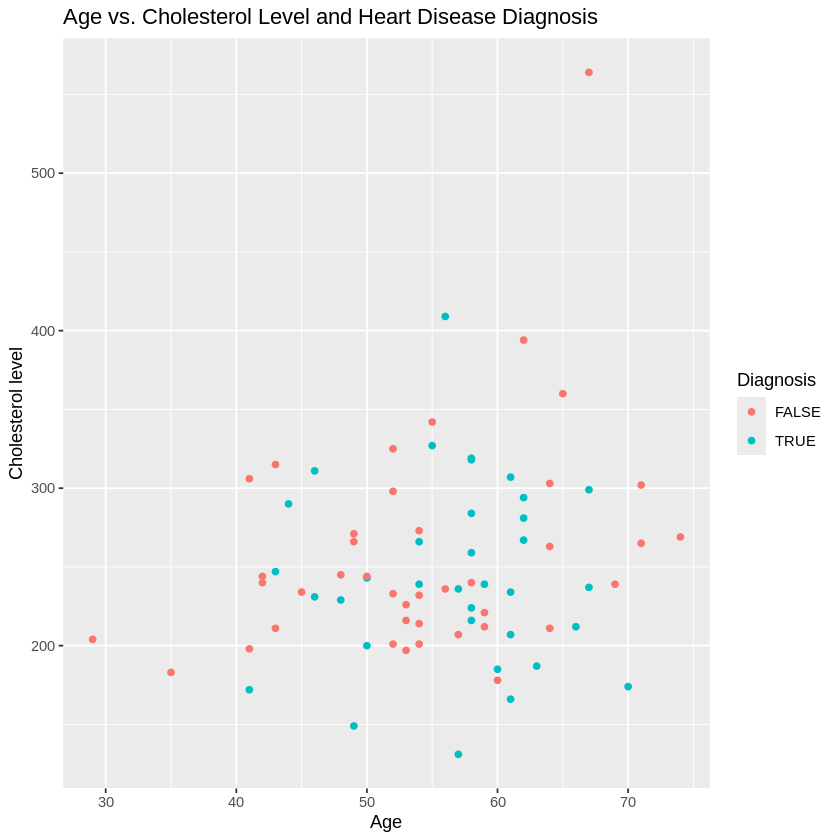

In [9]:
#visualize testing data
cleveland_plot <- cleveland_test |> ggplot(aes(x = age, y = chol, color = num_letter)) +
    geom_point() +
    labs(x = "Age", y = "Cholesterol level", color = "Diagnosis") +
    ggtitle("Age vs. Cholesterol Level and Heart Disease Diagnosis")
cleveland_plot

## Methods:

The data set being used for this analysis is **processed.cleveland.data** from UCI Heart Disease dataset; however, I will only use **age**, **chol (cholesterol level)** to predict **num (diagnosis)**

To predict the diagnosis of patients, I will use K-nearest neighbors algorithm, where I will find K "nearest" observations in my training data by calculating their Euclidean distance, then use their diagnoses to predict that of the new observation. Moreover, to evaluate the "quality" of this method, I would also be using metrics such as accuracy, precision, and recall.

I will create a scatter plot to visualize the results. The plot will be somewhat similar to that of testing data with **chol** vs. **age** (already standardized to support K-NN algorithm) and is colored based on patients' diagnosis **num_letter**. 

## Expected outcomes and significance:

#### Expected Findings
Based on the analysis of the selected variables (age and cholesterol levels), I expect to find that higher cholesterol levels may be significantly associated with a greater likelihood of being diagnosed with heart disease. Additionally, older patients are more likely to be diagnosed with heart disease, reflecting the established risk factor of aging.

#### Impact of Findings
The findings from this study could have significant implications in the field of healthcare. By confirming the predictive power of age and cholesterol levels, medical professionals can enhance their risk assessment models for heart disease, leading to earlier diagnosis and more effective intervention strategies. Moreover, educating patients about these key risk factors can empower them to take proactive steps in managing their health, such as monitoring cholesterol levels.

#### Future Questions
1. Can we improve predictions by including lifestyle factors like diet and exercise?
2. Is there any risk factors contributing to the likelihood of patients having heart disease, besides age and cholesterol level?

## Bibliography
Cleveland Clinic medical professional. “Heart Disease.” *Cleveland Clinic*, https://my.clevelandclinic.org/health/diseases/24129-heart-disease. Accessed 8 June 2024. 

Cleveland Clinic medical professional. “Coronary Artery Disease.” *Cleveland Clinic*, https://my.clevelandclinic.org/health/diseases/16898-coronary-artery-disease. Accessed 8 June 2024. 

WebMD Editorial Contributors. “Risk Factors for Heart Disease.” *WebMD*, 2023, www.webmd.com/heart-disease/risk-factors-for-heart-disease. Accessed 8 June 2024. 